# CLASSWORK 3


# Term Frequency Inverse Document Frequency (TFIDF)

In [2]:
# Importing Library

import pandas as pd

In [3]:
# Importing Dataset

file = r"D:\SHU\Sem 2\TBA 2\un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.tail(20)

,session,year,country,country_name,speaker,position,text
7487,70,2015,TTO,Trinidad and Tobago,Mr. Denis Moses,Minister for Foreign Affairs,It is a signal honour for me to address this b...
7488,70,2015,TUN,Tunisia,Mr. Habib Essid,Prime minister,"It is my honour, as I begin my statement, to c..."
7489,70,2015,TUR,Turkey,Mr. Ahmet Davutoğlu,Prime minister,I bring warm greetings and hope that the seven...
7490,70,2015,TUV,Tuvalu,Mr. Taukelina Finikaso,Minister for Foreign Affairs,On behalf of the Government and the people of ...
7491,70,2015,TZA,"Tanzania, United Republic of",Mr. Jakaya Mrisho Kikwete,President,I join those who have spoken before me in cong...
7492,70,2015,UGA,Uganda,Yoweri Kaguta Museveni,President,"I congratulate you, Sir, on your election as P..."
7493,70,2015,UKR,Ukraine,Mr. Petro Poroshenk,President,"On behalf of Ukraine, I sincerely congratulate..."
7494,70,2015,URY,Uruguay,Mr. Tabaré Vázquez,President,"I bring to this forum, the largest and most re..."
7495,70,2015,USA,United States,Barack Obama,President,Seventy years after the founding of the United...
7496,70,2015,VAT,Holy See (Vatican City State),Archbishop Paul Richard Gallagher,Secretary of Relations with States,"Echoing the sentiments of Pope Francis, who re..."


In [28]:
# Importing Library Natural Language Toolkit (NLTK)

import nltk

In [29]:
# Downloading Stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Yogesh
[nltk_data]     Bhardwaj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Storing stopwords in a variable

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'own', 'himself', 'mightn', "shan't", 'he', "you'd", 'why', 'didn', 'until', "that'll", 'was', 'don', 'd', 'aren', 'his', 'before', 'some', 'so', 'wasn', 'each', 'myself', 'hasn', 'wouldn', 're', 'doing', "she's", 'be', 'against', 'more', 'those', 'than', 'were', "you've", 'had', 'have', 'ain', "haven't", 'weren', 'isn', 'most', "you're", 'their', 'yours', 'of', "mustn't", 'other', 'them', 'under', "aren't", "shouldn't", 'up', 'doesn', 'now', 'ourselves', 'has', "you'll", 'while', 'all', 'for', 'the', "hasn't", 'how', 'is', 'won', 'below', 'very', 'yourselves', 'from', 't', 'after', 'this', "should've", 'y', 'o', 'll', 'your', 'that', 'on', 'yourself', 'off', 'haven', "doesn't", 'into', 'and', 'down', 'in', 'but', 'out', 'any', "won't", "wouldn't", 'been', 'an', "needn't", 'between', 'only', 'do', 'then', "weren't", 'if', 'once', 'it', 'which', 'its', "don't", 'a', 'ours', 'over', 'whom', 'm', 'mustn', 'am', 'through', 'such', 'herself', 'as', 'because', 'about', 'further', "couldn't"

In [31]:
# Importing regex library for regular expression

import regex as re

In [32]:
# Pre - processing pipeline

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

In [33]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [34]:
# Importing Counter module from collections library

from collections import Counter

In [35]:
# Counting the tokens

counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


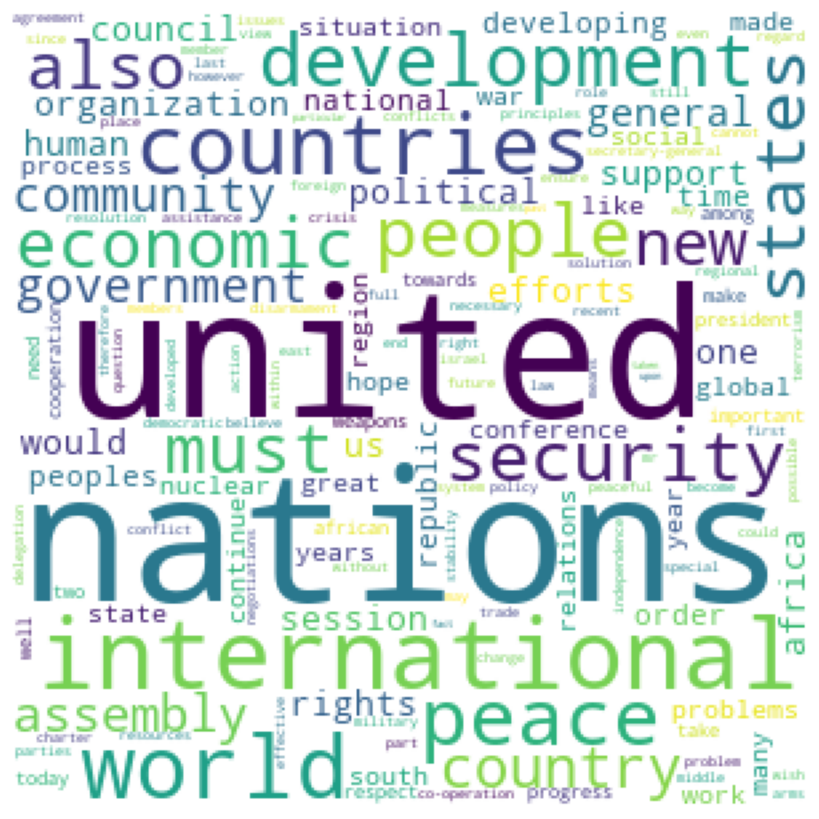

In [36]:
# Drawing the word cloud

from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [37]:
# Importing numpy library

import numpy as np

In [38]:
# Term Frequency Inverse Document Frequency (TFIDF)

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
        # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [39]:
# TFIDF = TF * IDF

freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


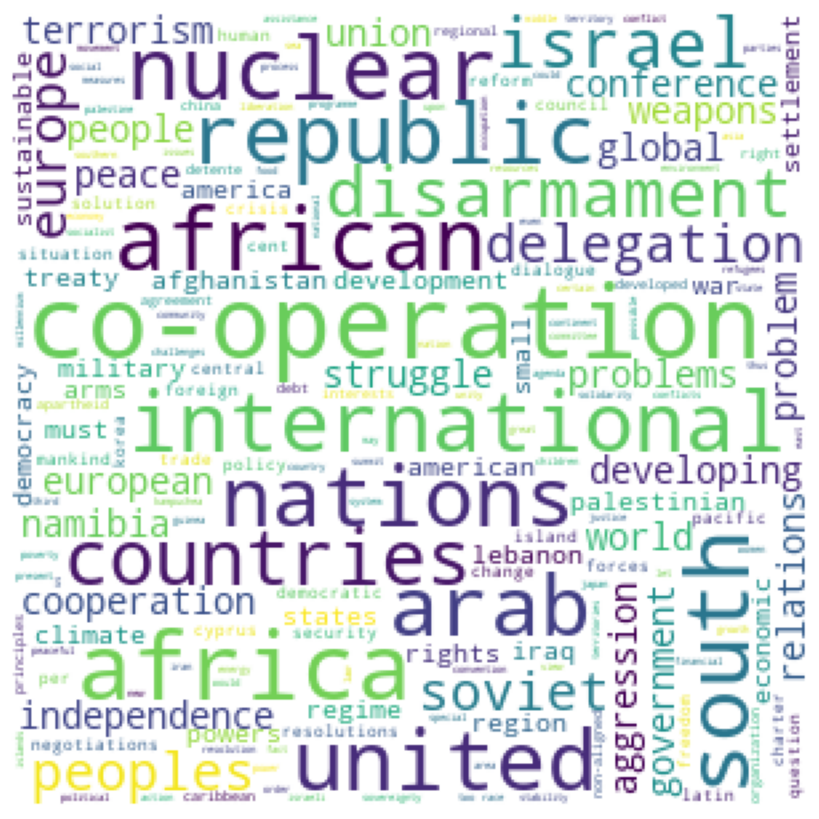

In [40]:
# Drawing the word cloud

wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [41]:
# Function to count the keywords

df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [42]:
# Function to group by year

def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

In [43]:
import seaborn as sns

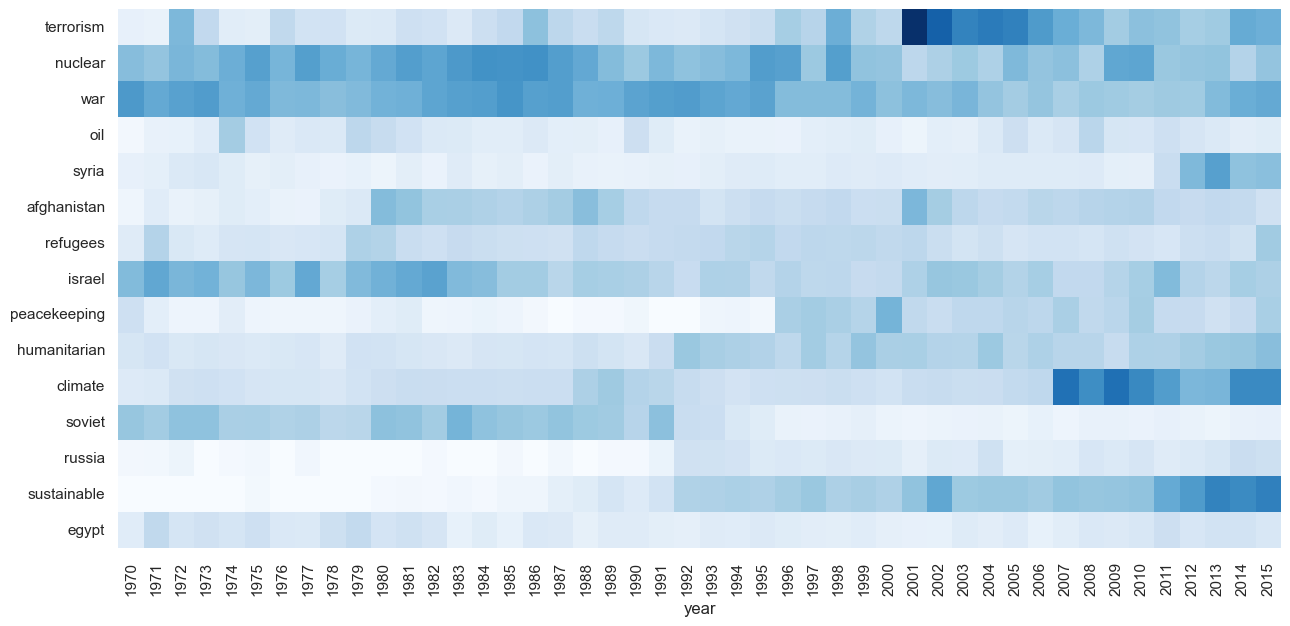

In [44]:
# Drawing the chart

keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping','humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']
freq_df = count_keywords_by(df, by='year', keywords=keywords)# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Blues")
sns.set(font_scale=1)